# A Machine Learning Approach to Mushroom Classification: Predicting Edibility and Toxicity Based on Physical Characteristics Using the UC Irvine Audubon Society Field Guide Dataset    

Author: Data-Git-Hub <br>
GitHub Project Repository Link: https://github.com/Data-Git-Hub/applied-ml-data-git-hub <br>
UCI Machine Learning Repository Link: https://archive.ics.uci.edu/dataset/73/mushroom <br>
18 March 2025 <br>

### Introduction
The objective of the Mushroom Classification problem is to predict whether a mushroom is edible or poisonous based on its physical and chemical characteristics. The dataset includes descriptions of 23 species of gilled mushrooms from the Agaricus and Lepiota families. These mushrooms are classified as definitely edible or definitely poisonous (including those with unknown edibility, which were grouped into the poisonous category). 

Unlike other biological classifications, there is no simple rule (such as "leaflets three, let it be" for poison ivy) to determine a mushroom’s safety. Instead, various morphological and chemical features must be analyzed, making machine learning a valuable tool for automating classification.

This project will involve: <br>

- Decision Tree Classifier (DT)  

    A Decision Tree splits data into smaller groups based on decision rules (such as "is cap color white?"). It works like a flowchart, where each decision point leads to another question until a final classification is reached. <br>

    Strengths: Easy to interpret and fast to train. <br>
    Weaknesses: Can overfit if the tree becomes too complex. <br>

- Support Vector Machine (SVM)  

    A Support Vector Machine (SVM) finds the best boundary (a hyperplane) to separate edible and poisonous mushrooms. It is effective in handling non-linear relationships through the use of different kernel functions. <br>

    Strengths: Works well with complex data and is effective when a clear margin of separation exists. <br>
    Weaknesses: Computationally expensive for large datasets. <br>

- Neural Network (NN)  

    A Neural Network is inspired by how the human brain processes information. It consists of layers of interconnected "neurons" that process input data and learn patterns. Given the dataset’s complexity, a neural network may identify subtle relationships between mushroom characteristics and toxicity. <br>

    Strengths: Can capture complex patterns and non-linear relationships. <br>
    Weaknesses: Requires careful tuning to avoid overfitting and may need more training data. <br>


### Imports
Python libraries are collections of pre-written code that provide specific functionalities, making programming more efficient and reducing the need to write code from scratch. These libraries cover a wide range of applications, including data analysis, machine learning, web development, and automation. Some libraries, such as os, sys, math, json, and datetime, come built-in with Python as part of its standard library, providing essential functions for file handling, system operations, mathematical computations, and data serialization. Other popular third-party libraries, like pandas, numpy, matplotlib, seaborn, and scikit-learn, must be installed separately and are widely used in data science and machine learning. The extensive availability of libraries in Python's ecosystem makes it a versatile and powerful programming language for various domains. <br>

Pandas is a powerful data manipulation and analysis library that provides flexible data structures, such as DataFrames and Series. It is widely used for handling structured datasets, enabling easy data cleaning, transformation, and aggregation. Pandas is essential for data preprocessing in machine learning and statistical analysis. <br>
https://pandas.pydata.org/docs/ <br>

NumPy (Numerical Python) is a foundational library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a comprehensive collection of mathematical functions to operate on these arrays efficiently. NumPy is a key component in scientific computing and machine learning. <br>
https://numpy.org/doc/stable/ <br>

Matplotlib is a widely used data visualization library that allows users to create static, animated, and interactive plots. It provides extensive tools for generating various chart types, including line plots, scatter plots, histograms, and bar charts, making it a critical library for exploratory data analysis. <br>
https://matplotlib.org/stable/contents.html <br>

Seaborn is a statistical data visualization library built on top of Matplotlib, designed for creating visually appealing and informative plots. It simplifies complex visualizations, such as heatmaps, violin plots, and pair plots, making it easier to identify patterns and relationships in datasets. <br>
https://seaborn.pydata.org/ <br>

Scikit-learn provides a variety of tools for machine learning, including data preprocessing, model selection, and evaluation. It contains essential functions for building predictive models and analyzing datasets. <br>
sklearn.metrics: This module provides various performance metrics for evaluating machine learning models. <br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>

IPython.core.display is a module from the IPython library that provides tools for displaying rich output in Jupyter Notebooks, including formatted text, images, HTML, and interactive widgets. It enhances visualization and interaction within Jupyter environments.
https://ipython.readthedocs.io/en/stable/api/generated/IPython.core.display.html <br>

In [29]:
# Data handling
import pandas as pd
import numpy as np

import itertools
import os

# Machine learning imports
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Fully disable output truncation in Jupyter (for VS Code)
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
# Display the DataFrame in Jupyter Notebook
display(outliers_df)

# Import necessary library
from ucimlrepo import fetch_ucirepo 

# Fetch dataset
mushroom = fetch_ucirepo(id=73)  

# Extract data as Pandas DataFrames
X = mushroom.data.features  
y = mushroom.data.targets  

# Combine features and target into a single DataFrame
mushroom_df = pd.concat([X, y], axis=1)

,Column,Rare Categories
0,cap-shape,"[s, c]"
1,cap-surface,[g]
2,cap-color,"[c, u, r]"
3,odor,[m]
4,gill-color,"[o, r]"
5,stalk-surface-above-ring,[y]
6,stalk-color-above-ring,"[c, y]"
7,stalk-color-below-ring,"[c, y]"
8,veil-color,[y]
9,ring-number,[n]


### Section 1. Import and Inspect Data

We will import the first few rows of the dataset and display important information to make decisions later through the process. <br>

#### Section 1.1. Load the Dataset and Display the First 10 Rows. 

Load the dataset from the repository from the UCI Machine Learning Repository at the following link: https://archive.ics.uci.edu/dataset/73/mushroom via Python. <br>

In [30]:
# Display dataset structure
print("\nDataset Shape:", mushroom_df.shape)

# Display data types of each column
print("\nData Types of Each Column:")
print(mushroom_df.dtypes)

# Show the first 10 rows of the dataset
display(mushroom_df.head(10))



Dataset Shape: (8124, 23)

Data Types of Each Column:
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
poisonous                   object
dtype: object


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m,e


#### 1.2. Check for Missing Values and Display Summary Statistics.

In [31]:
# Check for standard missing values (NaN)
print("\nMissing Values per Column:")
print(mushroom_df.isnull().sum())

# Check for non-standard missing values (e.g., '?', empty strings)
print("\nChecking for Non-Standard Missing Values:")

for col in mushroom_df.columns:
    missing_values = (mushroom_df[col] == '?').sum() + (mushroom_df[col] == '').sum()
    if missing_values > 0:
        print(f"{col}: {missing_values} missing values")
# continues on next block of code


Missing Values per Column:
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

Checking for Non-Standard Missing Values:


In [32]:
# Adjust Pandas display settings to prevent truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)    
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 0)         

# Convert summary statistics to a full string and print
summary_stats = mushroom_df.describe(include="all").to_string()
print("\nSummary Statistics:")
print(summary_stats)




Summary Statistics:
       cap-shape cap-surface cap-color bruises  odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color ring-number ring-type spore-print-color population habitat poisonous
count       8124        8124      8124    8124  8124            8124         8124      8124       8124        8124       5644                     8124                     8124                   8124                   8124      8124       8124        8124      8124              8124       8124    8124      8124
unique         6           4        10       2     9               2            2         2         12           2          4                        4                        4                      9                      9         1          4           3         5                 9          6       7         2
top            x           y         n     

#### 1.2.A. Listing the Unique Data Names Per Data Columns

Creating a unique_values_output.txt file to look at the values since the statistics showed that the amount was not too burdensome to get a better fidelity of the nature of the dataset.

In [33]:
# Define the output file path
output_file = r"c:\Projects\ml04\data\unique_values_output.txt"

# Save unique values to a text file
with open(output_file, "w") as f:
    for col in mushroom_df.columns:
        unique_values = mushroom_df[col].unique()
        f.write(f"\nColumn: {col} ({len(unique_values)} unique values)\n")
        
        # Write unique values in a structured format
        for value in unique_values:
            f.write(f"- {value}\n")
        
        f.write("-" * 50 + "\n")

print(f"\nUnique values saved to '{output_file}'. Open this file to view the full output.")




Unique values saved to 'c:\Projects\ml04\data\unique_values_output.txt'. Open this file to view the full output.


### Reflection 1: What do you notice about the dataset? Are there any data issues?

When reviewing the mushroom dataset, I noticed that all the features are categorical, which means that I will need to encode them properly before applying machine learning models. The dataset contains various characteristics of mushrooms, such as cap shape, color, odor, and other physical attributes, which will be useful in distinguishing between edible and poisonous mushrooms. One issue I found is the presence of missing or ambiguous values. Some columns contain question marks, which likely represent missing data that will need to be handled appropriately. <br>

Additionally, since all the features are categorical, I need to ensure that the encoding method preserves the meaningful relationships between values without introducing bias. Another potential issue is class imbalance, which could affect model performance if one class significantly outnumbers the other. Before proceeding with modeling, I will need to explore the distribution of classes and handle any missing or erroneous values to ensure the dataset is clean and ready for analysis. <br>

After reviewing `unique_values_output.txt`, I identified additional data cleaning and transformation opportunities. Some categorical variables could be simplified or grouped to reduce complexity while retaining meaningful distinctions. Additionally, certain columns contain values that could be converted into boolean features, which might improve model interpretability and efficiency. Implementing these transformations will help create a more diverse dataset that allows machine learning models to extract better patterns from the data. <br>

### Section 2. Data Exploration and Preparation

#### 2.1 Explore Data Patterns and Distributions

Before applying machine learning models, I need to explore the dataset's patterns and distributions to understand how different features relate to the target variable. Since all features in the mushroom dataset are categorical, traditional numerical distribution methods like histograms or summary statistics may not be as useful. Instead, I will focus on visualizing frequency distributions, identifying relationships between variables, and checking for imbalances in the dataset. <br>

One key step is to examine class distributions, particularly for the edibility target variable, to ensure that the dataset is balanced. If there is a significant class imbalance, it could affect model performance, causing the classifier to favor the majority class. Additionally, I will analyze feature distributions using bar charts to determine which features might be highly correlated with the classification outcome. Certain categorical variables, like odor or gill-color, might be strong indicators of whether a mushroom is edible or poisonous. <br>

To gain deeper insights, I will also explore pairwise relationships between categorical variables using cross-tabulations and heatmaps. This will help me identify which features have a strong association with each other and whether any redundant or irrelevant features should be removed. By thoroughly understanding the dataset’s structure, I can make informed preprocessing decisions, such as encoding techniques and feature selection, to improve the performance of my machine learning models. <br>

##### 2.1.1. Create Histograms, Box Plots, and Count Plots for Categorical Variables
Since the mushroom dataset consists entirely of categorical variables, I need to use visualizations that effectively display the distribution of each feature. Histograms, boxplots, and count plots allow me to better understand the frequency of different categories, detect potential imbalances, and identify patterns that might influence the classification of mushrooms as edible or poisonous. <br>

##### 2.1.1.1 Histograms for Categorical Variables
Histograms are commonly used for numerical data, but for categorical variables, I will use count plots, which display how often each category appears in the dataset. This helps me determine whether certain features are dominant or underrepresented, which can impact model performance. <br> 

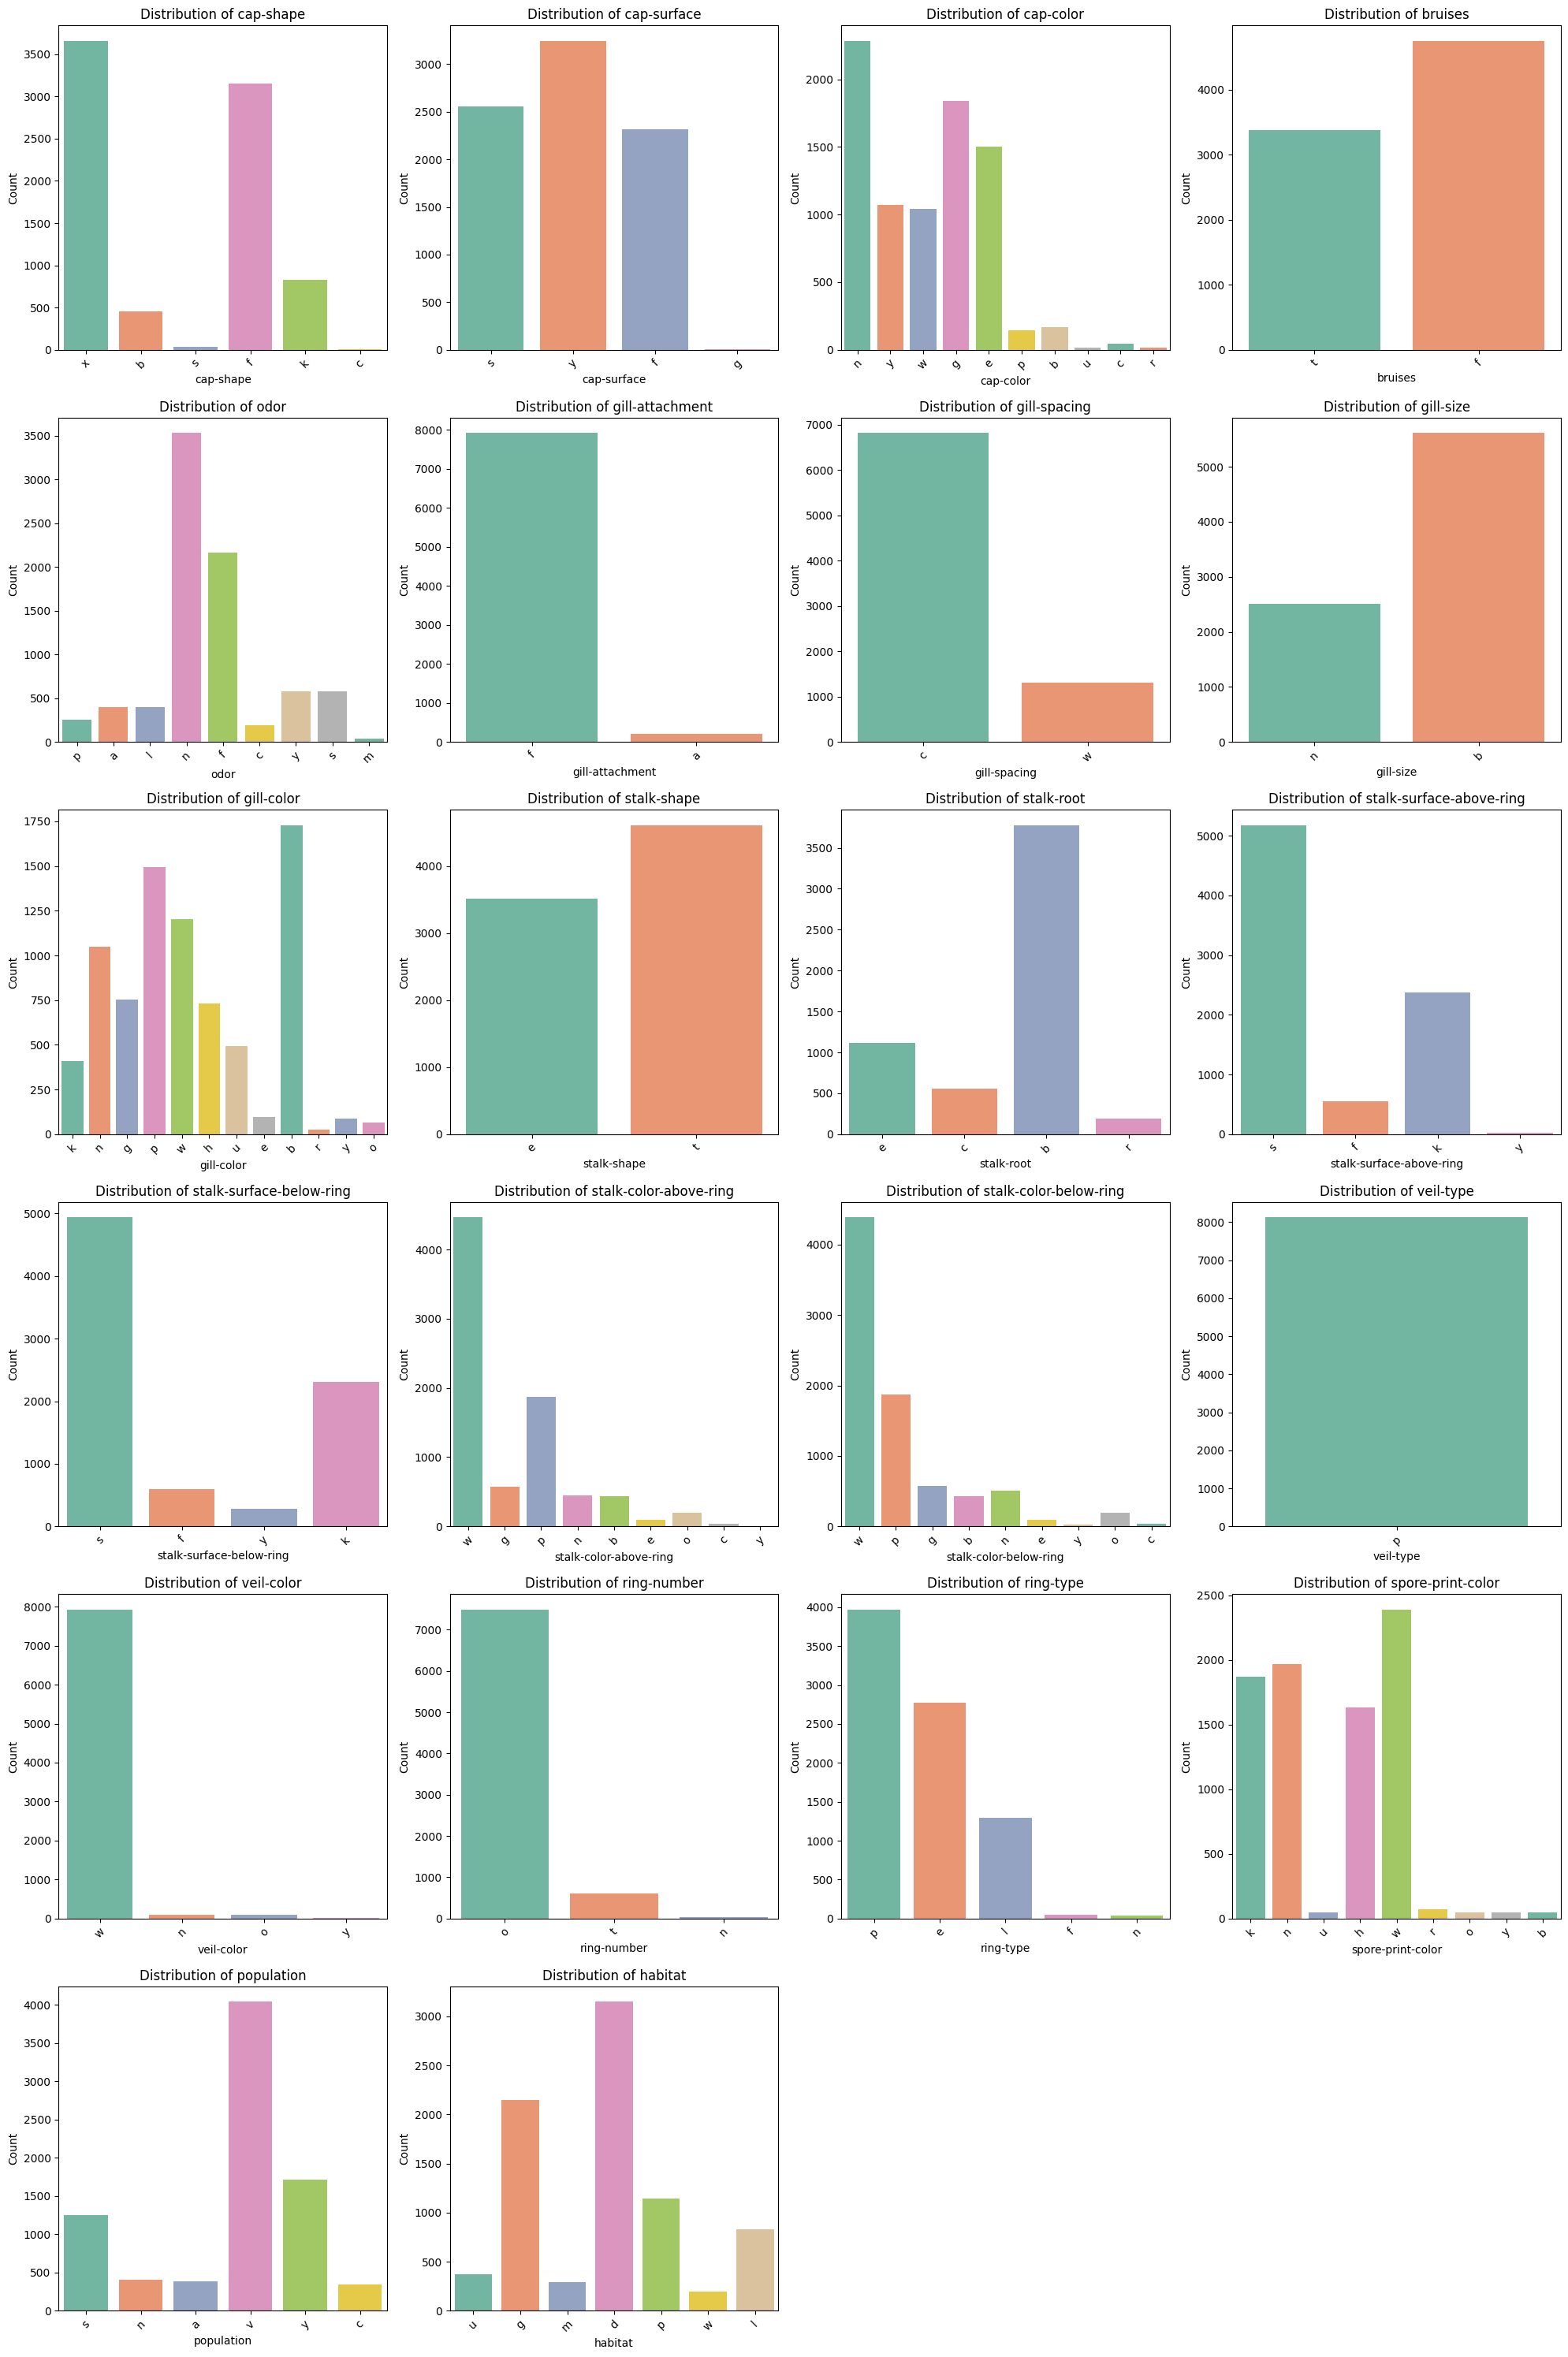

In [34]:
# Select categorical columns (excluding target variable)
categorical_columns = mushroom_df.columns.tolist()
categorical_columns.remove("poisonous")  # Exclude target variable

# Determine the grid size for subplots (adjust based on number of features)
num_cols = 4  # Number of columns per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)  # Ensure enough rows

# Set up the figure size dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten the array for easy iteration

# Generate count plots for each categorical feature
for i, col in enumerate(categorical_columns):
    sns.countplot(data=mushroom_df, x=col, hue=col, palette="Set2", legend=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for readability

# Hide any extra empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

##### 2.1.1.2. Box Plots for Categorical Variables
Box plots are useful for comparing distributions, even for categorical data, by encoding categorical values numerically and examining their spread. This can highlight potential outliers or differences in distributions across categories, particularly when analyzing relationships between features and the target variable.

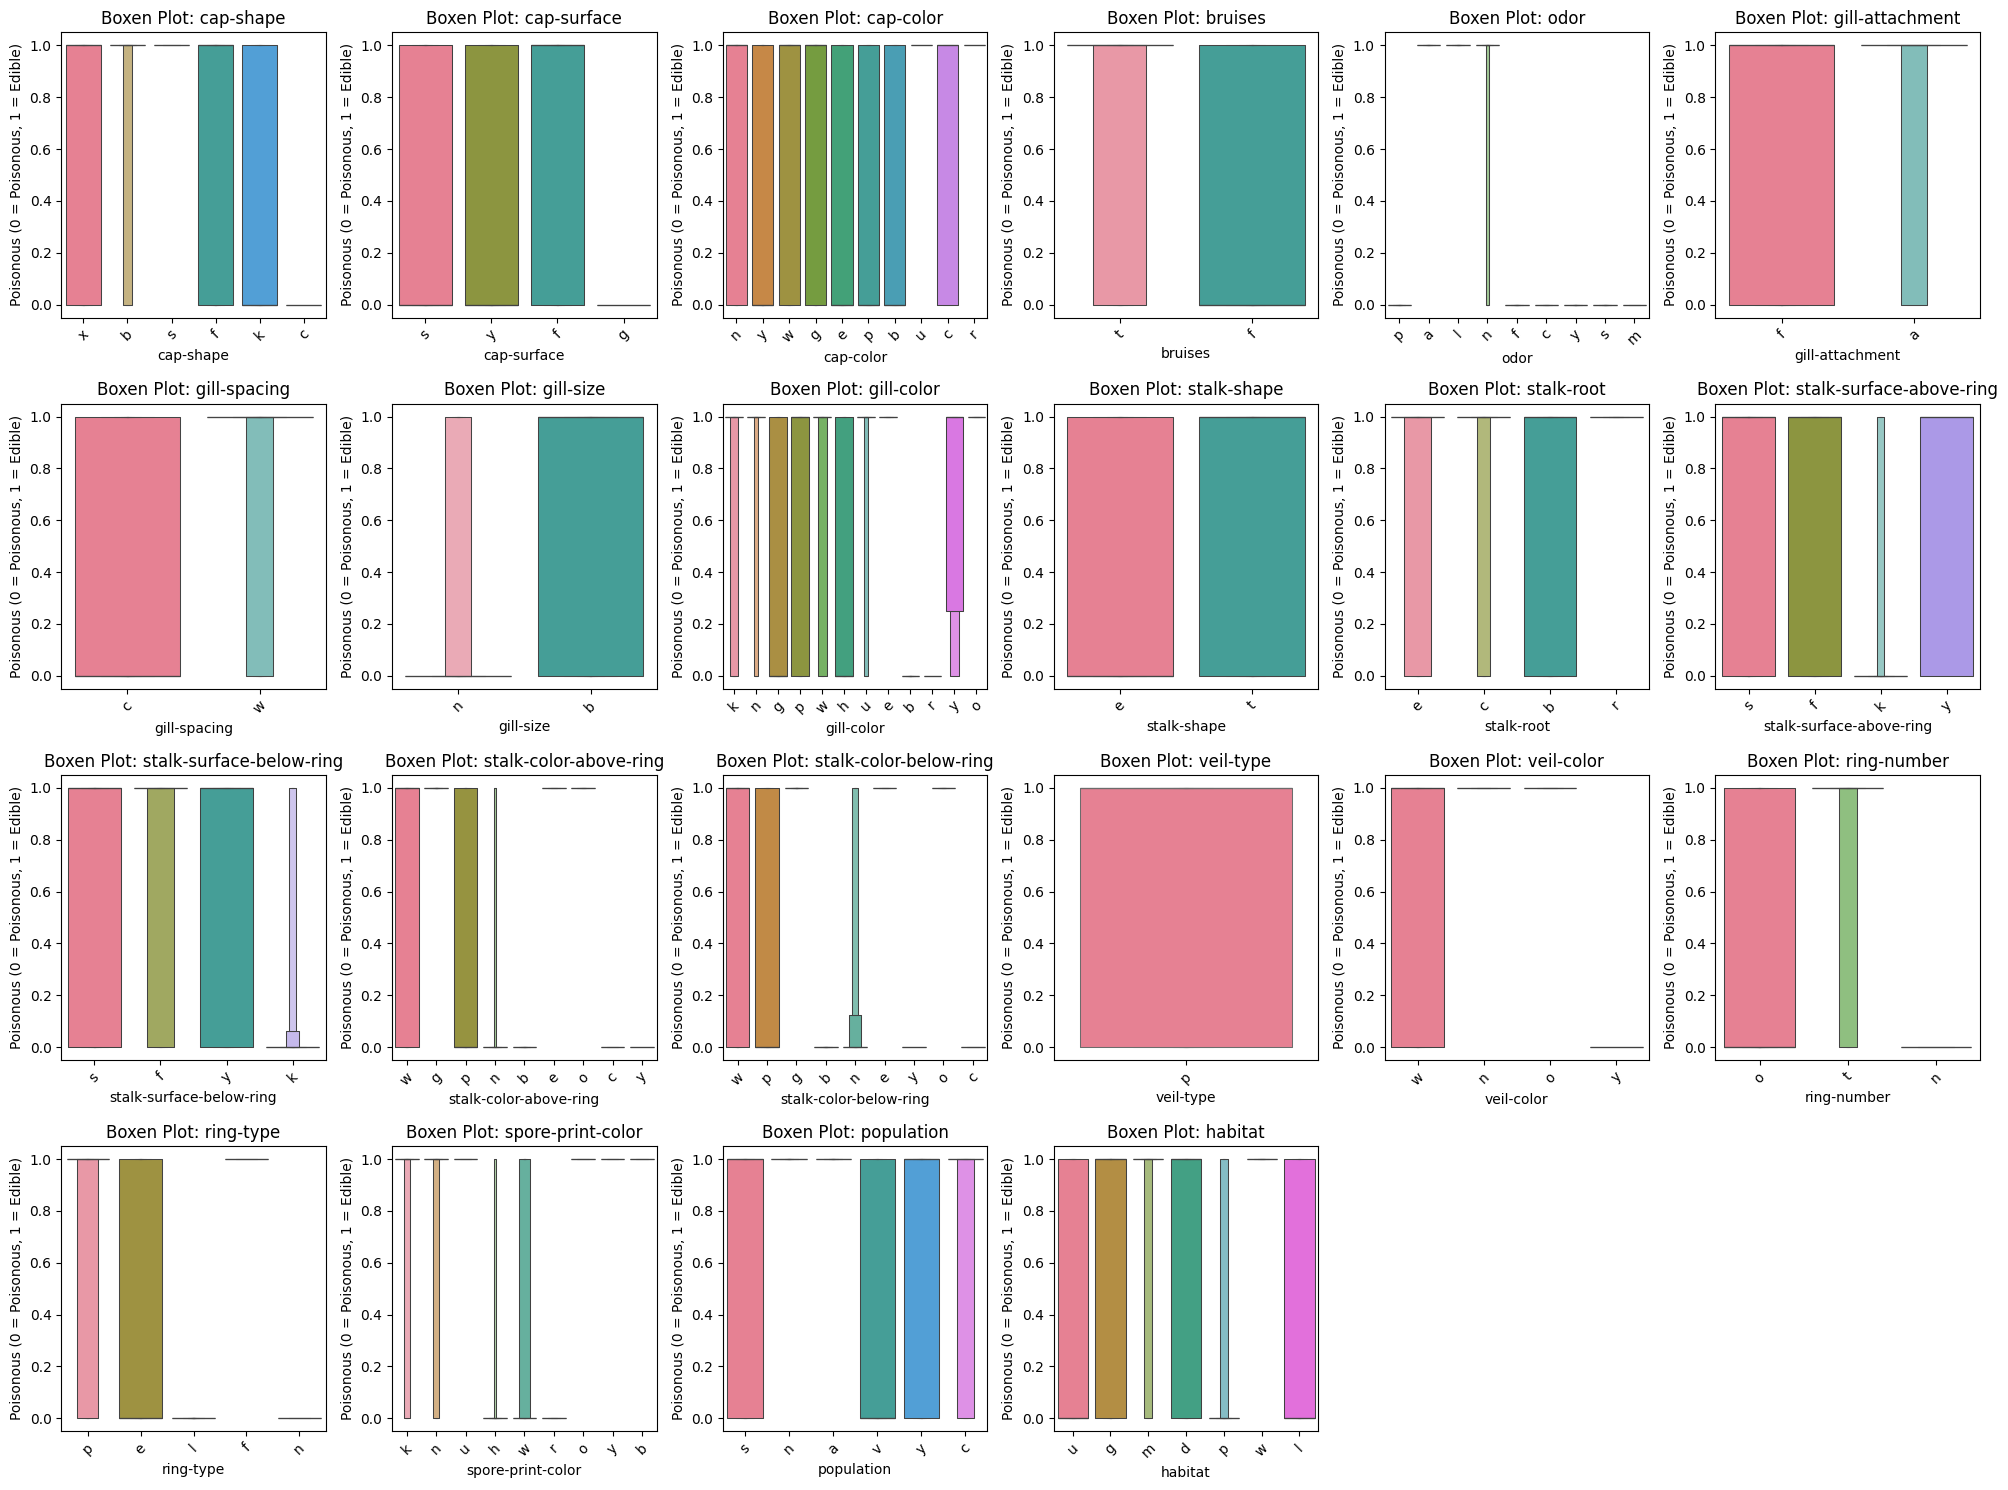

In [35]:
# Convert categorical target to numeric (0 = Poisonous, 1 = Edible)
mushroom_df["poisonous_numeric"] = mushroom_df["poisonous"].map({'p': 0, 'e': 1})

# Select categorical columns (excluding target variable)
categorical_columns = mushroom_df.columns.tolist()
categorical_columns.remove("poisonous")  # Exclude original target variable
categorical_columns.remove("poisonous_numeric")  # Exclude numeric target

# Set up grid for multiple Boxen plots
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))  # Adjust layout based on feature count
axes = axes.flatten()  # Flatten for easy iteration

# Loop through each categorical feature and create Boxen plot
for i, col in enumerate(categorical_columns):
    sns.boxenplot(
        x=col, 
        y="poisonous_numeric", 
        data=mushroom_df, 
        ax=axes[i], 
        hue=col,  # FIX: Explicitly set hue to avoid warning
        palette="husl",  # FIX: Use a valid color palette
        legend=False  # Remove redundant legends for readability
    )

    axes[i].set_title(f"Boxen Plot: {col}")  
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Poisonous (0 = Poisonous, 1 = Edible)")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels

# Hide any unused subplot spaces
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 2.2.1.3. Count Plots for Categorical Variables
Scatter plots are typically used for numerical relationships, but in this case, I can use swarm plots or strip plots to display how individual categorical values relate to classification. This allows me to see feature separability, helping determine whether certain categories strongly correlate with the edible or poisonous label. <br>

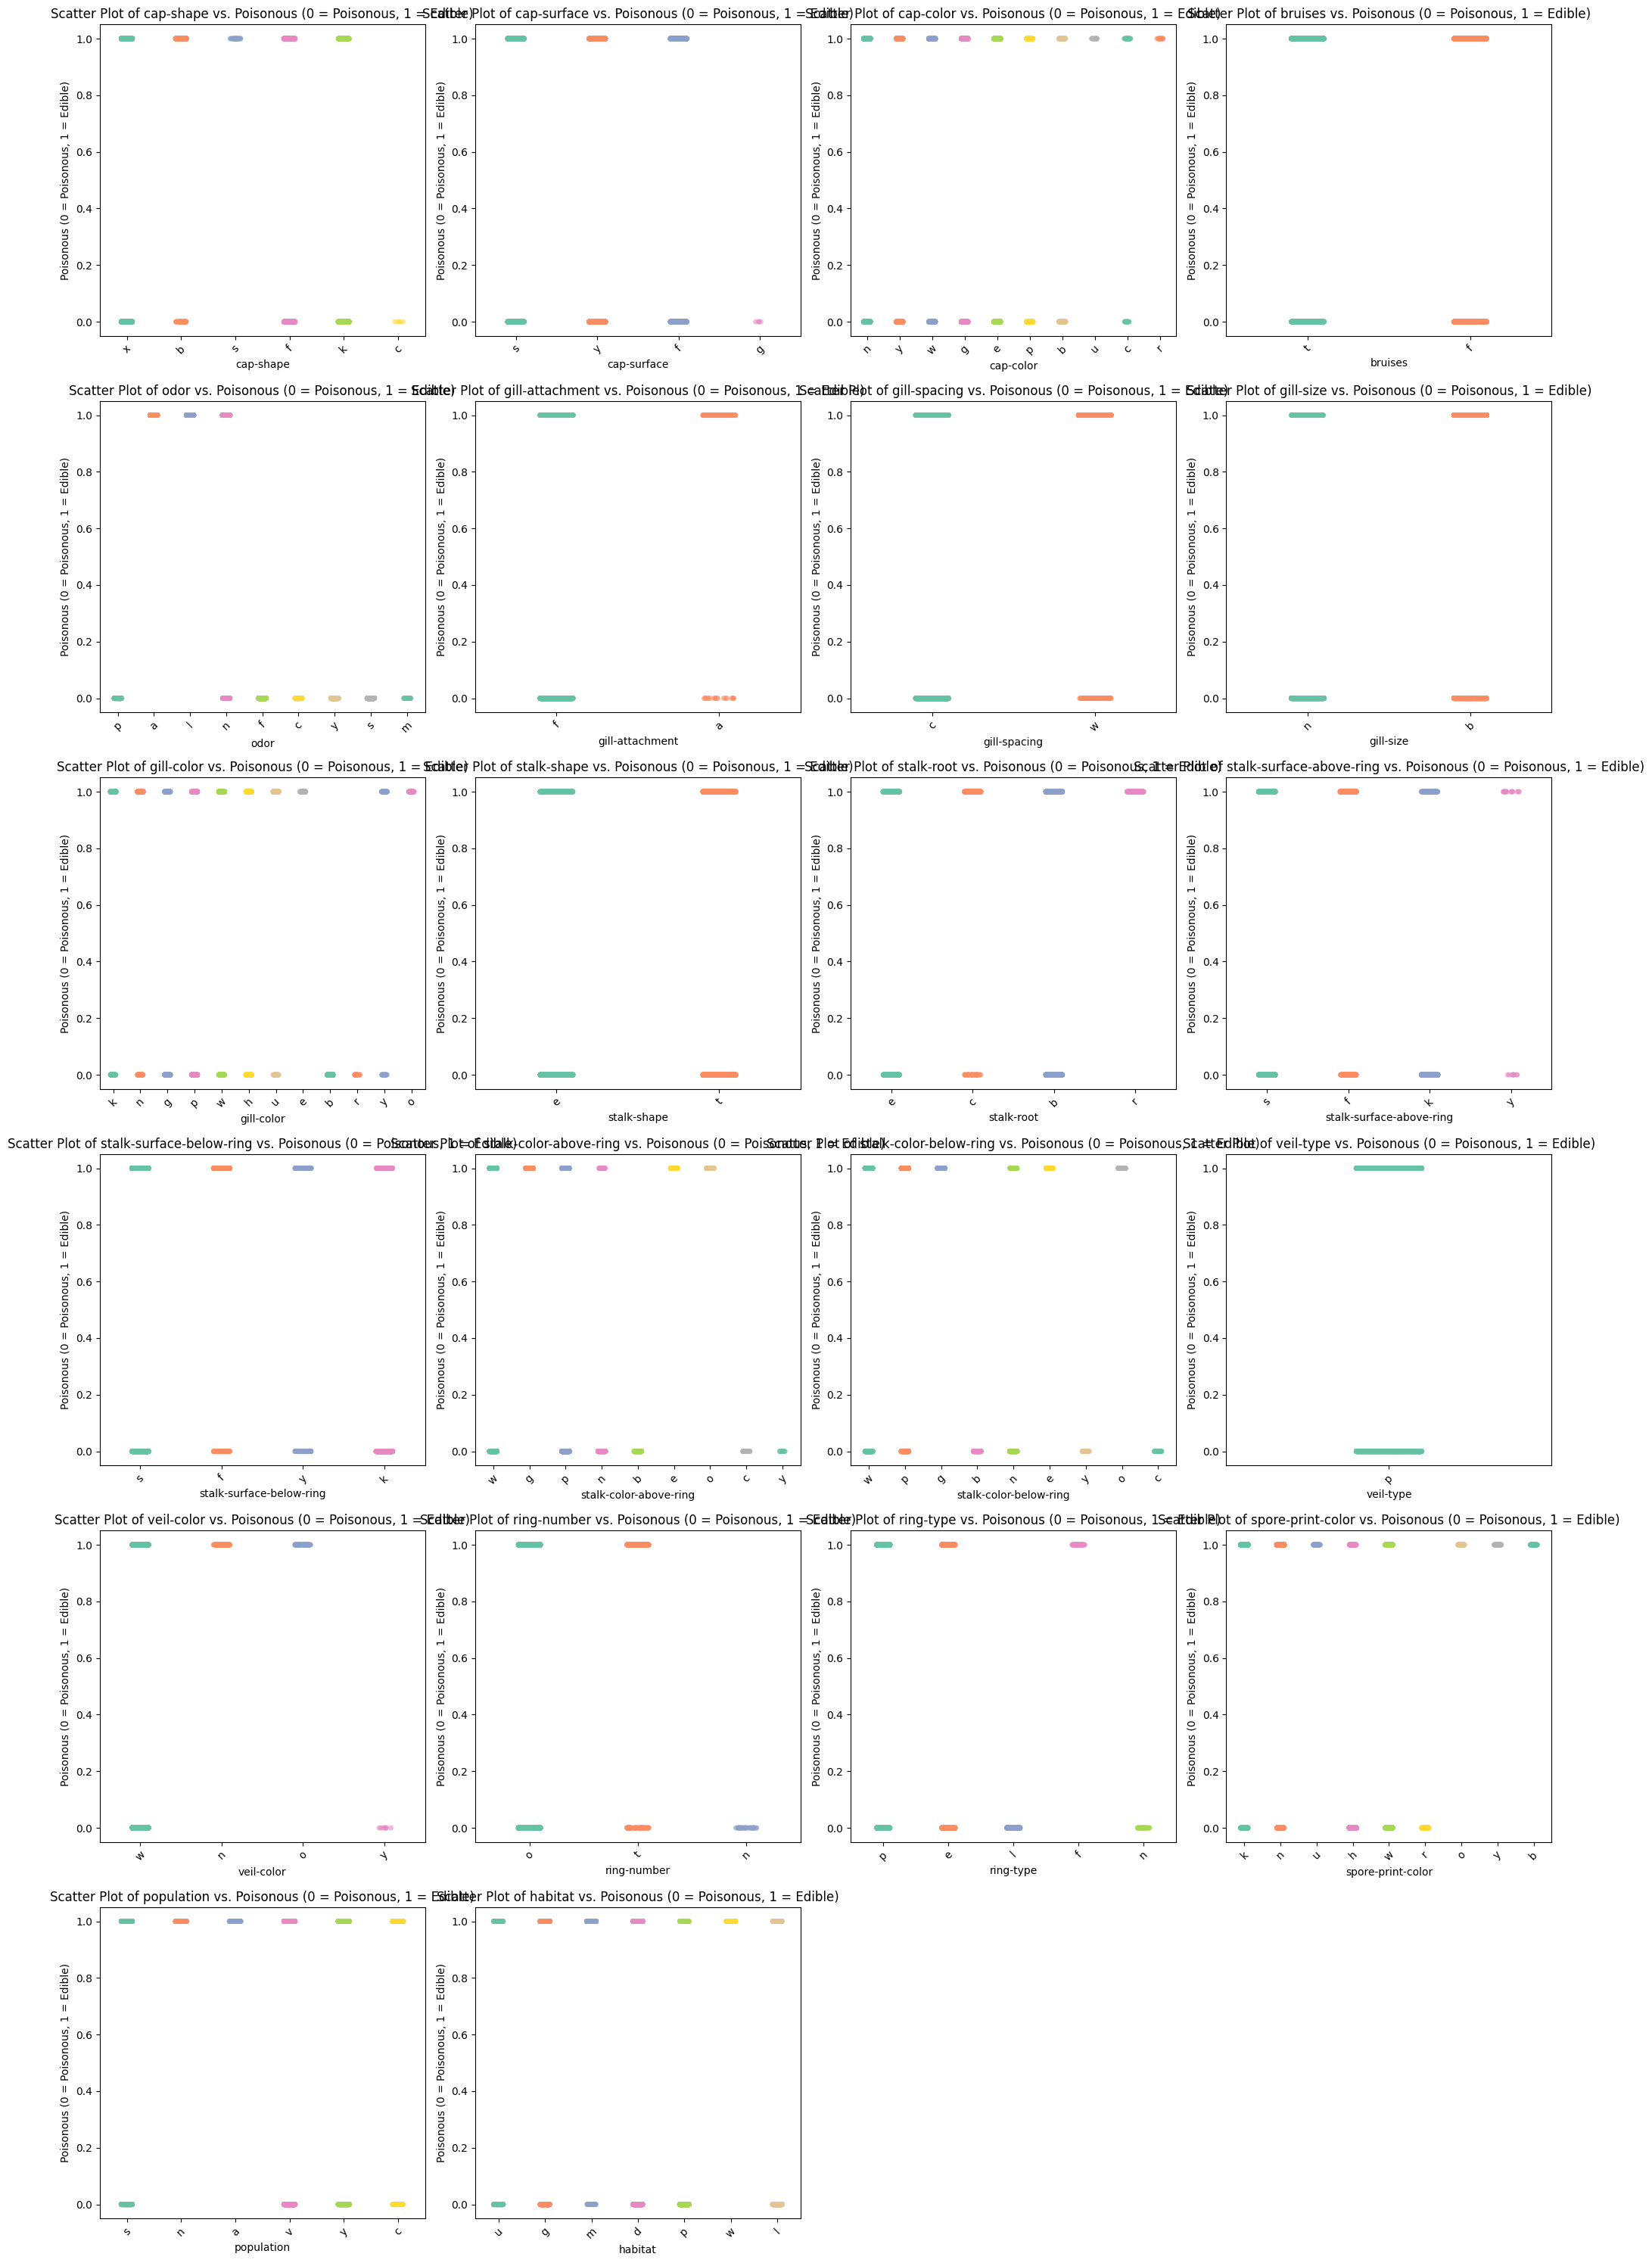

In [36]:
# Convert categorical target to numeric (0 = Poisonous, 1 = Edible)
mushroom_df["poisonous_numeric"] = mushroom_df["poisonous"].map({'p': 0, 'e': 1})

# Select categorical columns (excluding target variable)
categorical_columns = mushroom_df.columns.tolist()
categorical_columns.remove("poisonous")  # Exclude original target variable
categorical_columns.remove("poisonous_numeric")  # Exclude numeric target

# Determine the grid size for subplots (adjust based on number of features)
num_cols = 4  # Number of columns per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)  # Ensure enough rows

# Set up the figure size dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten the array for easy iteration

# Generate scatter plots (strip plots) for each categorical feature
for i, col in enumerate(categorical_columns):
    sns.stripplot(x=col, y="poisonous_numeric", hue=col, data=mushroom_df, jitter=True, alpha=0.6, palette="Set2", legend=False, ax=axes[i])
    axes[i].set_title(f"Scatter Plot of {col} vs. Poisonous (0 = Poisonous, 1 = Edible)")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Poisonous (0 = Poisonous, 1 = Edible)")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for readability

# Hide any extra empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

##### More Comprehensive Scatter Plot as a .png in data folder.

In [37]:
# Define save directory
save_dir = r"c:\Projects\ml04\data"
os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists

# Convert categorical target to numeric (0 = Poisonous, 1 = Edible)
mushroom_df["poisonous_numeric"] = mushroom_df["poisonous"].map({'p': 0, 'e': 1})

# Encode categorical columns as numerical
encoded_df = mushroom_df.copy()
for col in mushroom_df.columns:
    encoded_df[col] = encoded_df[col].astype('category').cat.codes  # Convert categories to numeric

# Select numeric columns (excluding target variable)
numeric_columns = encoded_df.select_dtypes(include=['number']).columns.tolist()
numeric_columns.remove("poisonous_numeric")  # Exclude target

# Generate a list of unique colors
colors = sns.color_palette("husl", n_colors=len(numeric_columns))

# Create scatter plots for all feature pairs
feature_combinations = list(itertools.combinations(numeric_columns, 2))  # Get all unique column pairs
num_plots = len(feature_combinations)

# Determine grid size (3 columns per row, adjust rows automatically)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)  # Ensure enough rows

# Set figure size dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the array for easy iteration

# Loop through each feature pair and create a scatter plot
for i, (col_x, col_y) in enumerate(feature_combinations):
    color_x = colors[list(numeric_columns).index(col_x)]
    sns.scatterplot(x=encoded_df[col_x], y=encoded_df[col_y], ax=axes[i], color=color_x, alpha=0.6)

    # Set titles and labels
    axes[i].set_title(f"{col_x} vs {col_y}")
    axes[i].set_xlabel(col_x)
    axes[i].set_ylabel(col_y)

# Hide any extra empty subplots
for i in range(len(feature_combinations), len(axes)):
    fig.delaxes(axes[i])  # Removes unused subplot spaces

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure instead of showing it
output_path = os.path.join(save_dir, "scatter_plots_mushroom.png")
fig.savefig(output_path, dpi=300, bbox_inches='tight')  # Save as high-quality PNG

# Close the figure to avoid displaying it in Jupyter Notebook
plt.close(fig)

#Print Statement
print(f"Scatter plots saved to: {output_path}")

Scatter plots saved to: c:\Projects\ml04\data\scatter_plots_mushroom.png


##### 2.1.2. Identify Patterns, Outliers, and Anomalies in Feature Distributions.

When analyzing the mushroom dataset, one of the key steps I need to take is identifying patterns, outliers, and anomalies in the feature distributions. Since all the features in this dataset are categorical, detecting outliers is not as straightforward as it would be in a numerical dataset. Instead of looking at extreme values in a numerical sense, I need to analyze rare or unusual category occurrences that might indicate data anomalies. <br>

One way I can identify anomalies is by analyzing category frequencies. If a particular category appears in an extremely low percentage of the data, it might be an outlier or a data entry issue. Another approach is checking for inconsistencies in feature relationships. For example, if a particular mushroom characteristic is almost always associated with edibility but suddenly appears in a poisonous mushroom, that could indicate an anomaly. <br>

I also need to check for missing or unusual values that might affect classification accuracy. Some categorical values might be rare but still valid, while others could be errors. If I remove too many rare values, I might lose important information, but if I leave them in, the model could overfit to rare patterns. By exploring these patterns, I can make better decisions about whether to retain, merge, or remove certain values to improve the predictive power of the dataset. <br>

In [38]:
# Convert outliers dictionary to DataFrame for better readability
outliers_df = pd.DataFrame(list(outliers_detected.items()), columns=["Column", "Rare Categories"])

# Print full DataFrame output to avoid truncation
print("\nRare Category Analysis (Full Display):")
print(outliers_df.to_string())  # Ensures full output display

# Save rare category analysis to a file
output_file = r"c:\Projects\ml04\data\rare_category_analysis.txt"

with open(output_file, "w") as f:
    f.write(outliers_df.to_string(index=False))  # Save clean format without index

print(f"\nRare category analysis saved to '{output_file}'. Open this file to view details.")



Rare Category Analysis (Full Display):
                      Column  Rare Categories
0                  cap-shape           [s, c]
1                cap-surface              [g]
2                  cap-color        [c, u, r]
3                       odor              [m]
4                 gill-color           [o, r]
5   stalk-surface-above-ring              [y]
6     stalk-color-above-ring           [c, y]
7     stalk-color-below-ring           [c, y]
8                 veil-color              [y]
9                ring-number              [n]
10                 ring-type           [f, n]
11         spore-print-color  [r, u, o, y, b]

Rare category analysis saved to 'c:\Projects\ml04\data\rare_category_analysis.txt'. Open this file to view details.


##### 2.1.3. Check for Class Imbalance in the Target Variable.

When working with classification problems, it is crucial to check for class imbalance in the target variable. If one class is significantly more frequent than the other, the model might become biased, favoring the majority class while underperforming on the minority class. In this dataset, our target variable, poisonous, is binary (0 for poisonous and 1 for edible). If there is an imbalance, I may need to apply techniques such as resampling (over-sampling the minority class or under-sampling the majority class) or use weighted models to ensure fair classification. <br>

To determine if class imbalance is present, I will visualize the distribution of the poisonous column using a count plot and calculate the percentage of each class. If one class dominates, I will need to decide on the best strategy to address it before proceeding with model training. <br>


Class Distribution of Target Variable (Poisonous):
poisonous
e    50.400315
p    49.599685


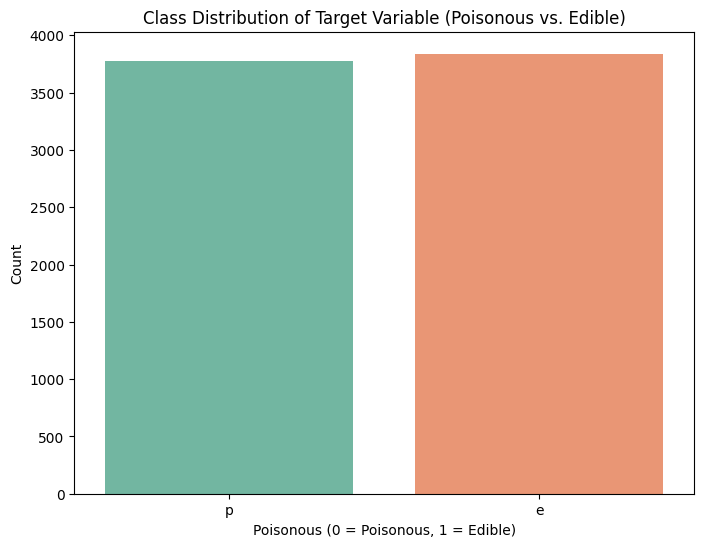

In [44]:
# Count the occurrences of each class
class_counts = mushroom_df["poisonous"].value_counts(normalize=True) * 100  # Convert to percentage

# Print class distribution details
print("\nClass Distribution of Target Variable (Poisonous):")
print(class_counts.to_string())

# Plot class distribution (FIX: Explicitly assign hue and disable legend)
plt.figure(figsize=(8, 6))
sns.countplot(data=mushroom_df, x="poisonous", hue="poisonous", palette="Set2", legend=False)
plt.title("Class Distribution of Target Variable (Poisonous vs. Edible)")
plt.xlabel("Poisonous (0 = Poisonous, 1 = Edible)")
plt.ylabel("Count")
plt.show()

#### 2.2 Handle Missing Values and Clean Data

When handling missing values and cleaning the data, I need to first determine where the gaps exist and how they might impact the analysis. Since this dataset consists entirely of categorical data, missing values should be treated carefully to avoid introducing bias or losing valuable information. One approach is to replace missing values with the most frequently occurring category in a given column, ensuring that the imputed values align with the overall distribution of the dataset. This is particularly useful for features where missing values are scattered and do not represent a significant portion of the data. <br>

However, if a column contains an excessive number of missing values, removing the column entirely might be the best option to prevent introducing unreliable information. I need to establish a reasonable threshold to determine whether a feature is worth keeping. If a column is missing more than 40% of its values, I may consider dropping it instead of attempting to impute it. <br>

Additionally, some missing values may indicate a meaningful distinction rather than an actual gap. For example, if missing values appear in the stalk-root column, it could suggest that certain mushrooms naturally lack a defined root structure. In such cases, it may be beneficial to create a new category to label missing values explicitly rather than imputing or dropping them. <br>

Once I finalize my approach to handling missing values, I will clean the dataset by ensuring all values are formatted correctly, removing any redundant columns, and preparing the data for encoding so that it can be effectively used in machine learning models. <br>
    
##### 2.2.1 Impute or Drop Missing Values. 

When analyzing the mushroom dataset, I found that missing values appear in specific columns rather than being spread randomly throughout the dataset. The most noticeable missing values are in the stalk-root column, where a significant portion of the data is represented by question marks "?". Since this is a categorical dataset, missing values should be carefully handled to avoid introducing bias into the model. <br>

For handling these missing values, I have two main approaches. If the missing values are few and do not significantly affect the dataset, I can drop those rows entirely to prevent noise. However, if a column has a substantial number of missing values, removing them might result in excessive data loss, so I would need to impute them with the most frequent category or a meaningful replacement based on other variables. Since the stalk-root column has a large proportion of missing values, imputing them with the most frequent value or using domain knowledge might be the best option. <br>

To ensure consistency, I will first identify all missing values across the dataset, decide whether to drop or impute them based on their impact, and then apply the appropriate cleaning techniques. <br>

In [39]:
# Replace '?' with NaN to properly detect missing values
mushroom_df.replace("?", np.nan, inplace=True)

# Check for missing values after conversion
missing_values = mushroom_df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0])  # Show only columns with missing values

# Handle missing values
# Drop columns if they have an excessive amount of missing data (example threshold: 40%)
threshold = 0.4 * len(mushroom_df)  # 40% threshold
columns_to_drop = missing_values[missing_values > threshold].index.tolist()

if columns_to_drop:
    print("\nDropping columns due to excessive missing values:", columns_to_drop)
    mushroom_df.drop(columns=columns_to_drop, inplace=True)

# Impute remaining missing values with the most frequent value in each column
for col in mushroom_df.columns:
    if mushroom_df[col].isnull().sum() > 0:
        most_frequent_value = mushroom_df[col].mode()[0]  # Get most common value
        mushroom_df.loc[:, col] = mushroom_df[col].fillna(most_frequent_value)  # <- Fix applied
        print(f"\nImputing missing values in {col} with '{most_frequent_value}'")

# Verify missing values are handled
print("\nFinal Check for Missing Values:")
print(mushroom_df.isnull().sum().sum(), "missing values remaining.")


Missing Values per Column:
stalk-root    2480
dtype: int64

Imputing missing values in stalk-root with 'b'

Final Check for Missing Values:
0 missing values remaining.


##### 2.2.2. Remove or Transform Outliers.

Before proceeding with model training, I need to examine the dataset for any outliers that could negatively impact classification performance. Since all features in the mushroom dataset are categorical, traditional numerical outlier detection methods (such as using Z-scores or the IQR method) are not applicable. Instead, I will analyze feature distributions to identify rare categories that might be mislabeled data points or errors. If certain categories appear extremely infrequent, they could either be noise or genuine rare cases that should be handled carefully. <br>

To address outliers, I will take two approaches. First, I will remove categories that appear extremely infrequently if they do not contribute meaningful information. This is useful when a category appears only once or twice and may be due to data entry errors. Second, if an infrequent category still holds value but could cause issues due to its rarity, I will group it with a similar, more common category to preserve the dataset's structure while reducing fragmentation. This transformation helps ensure the dataset remains balanced and prevents bias in the classification process. <br>

By handling outliers appropriately, I aim to improve the model's generalization and ensure that it learns from meaningful patterns rather than noise. For our purposes, we will be removing the rows with rare categories, Option 1. <br>

In [40]:
# Adjust Pandas display settings to prevent truncation
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 0)

# Analyze frequency of unique values in each categorical column
print("\nUnique Value Counts per Column:")

rare_threshold = 0.01 * len(mushroom_df)  # Define rare threshold (1% of dataset)

# Create a copy to avoid SettingWithCopyWarning
mushroom_df_cleaned = mushroom_df.copy()

for col in mushroom_df_cleaned.columns:
    value_counts = mushroom_df_cleaned[col].value_counts()
    
    # Identify rare categories (less than 1% of total data)
    rare_categories = value_counts[value_counts < rare_threshold].index.tolist()
    
    if rare_categories:
        print(f"\nColumn: {col}")
        print(f"Rare Categories (Appearing <1% of the time): {rare_categories}")
        
        # Option 1: Remove rows with rare categories
        mushroom_df_cleaned = mushroom_df_cleaned.loc[~mushroom_df_cleaned[col].isin(rare_categories)]
        print(f" - Removed {len(rare_categories)} rare categories from {col}.")

        # Option 2 (Alternative): Merge rare categories into a new 'Other' category
        # mushroom_df_cleaned.loc[:, col] = mushroom_df_cleaned[col].replace(rare_categories, "Other")
        # print(f" - Transformed rare categories in {col} into 'Other'.")

# Assign cleaned DataFrame back
mushroom_df = mushroom_df_cleaned

# Final check to confirm outliers were handled
print("\nFinal Dataset Shape After Removing Rare Categories:", mushroom_df.shape)

# Define correct file path for saving
output_file = r"c:\Projects\ml04\data\rare_category_analysis.txt"

# Save rare category analysis to the specified directory
with open(output_file, "w", encoding="utf-8") as f:
    for col in mushroom_df.columns:
        value_counts = mushroom_df[col].value_counts()
        f.write(f"\nColumn: {col}\n")
        f.write(value_counts.to_string())
        f.write("\n" + "-" * 50 + "\n")

print(f"\nRare category analysis saved to '{output_file}'. Open this file to view details.")




Unique Value Counts per Column:

Column: cap-shape
Rare Categories (Appearing <1% of the time): ['s', 'c']
 - Removed 2 rare categories from cap-shape.

Column: cap-surface
Rare Categories (Appearing <1% of the time): ['g']
 - Removed 1 rare categories from cap-surface.

Column: cap-color
Rare Categories (Appearing <1% of the time): ['c', 'u', 'r']
 - Removed 3 rare categories from cap-color.

Column: odor
Rare Categories (Appearing <1% of the time): ['m']
 - Removed 1 rare categories from odor.

Column: gill-color
Rare Categories (Appearing <1% of the time): ['y', 'o', 'r']
 - Removed 3 rare categories from gill-color.

Column: stalk-surface-above-ring
Rare Categories (Appearing <1% of the time): ['y']
 - Removed 1 rare categories from stalk-surface-above-ring.

Column: stalk-color-above-ring
Rare Categories (Appearing <1% of the time): ['o']
 - Removed 1 rare categories from stalk-color-above-ring.

Column: stalk-color-below-ring
Rare Categories (Appearing <1% of the time): ['y']
 -

##### 2.2.3. Convert categorical data to numerical format using encoding

Since the mushroom dataset consists entirely of categorical features, I need to convert these variables into a numerical format before applying machine learning models. Most machine learning algorithms, including decision trees, support vector machines, and neural networks, require numerical input, so encoding is an essential preprocessing step. I will use one-hot encoding for nominal (unordered) categories, ensuring that no artificial ordinal relationship is introduced. For features with a natural order, I may use ordinal encoding to preserve meaningful rank-based relationships. <br>

One challenge in encoding categorical data is the risk of creating high-dimensional datasets when dealing with features with many unique values. To address this, I will evaluate whether grouping rare categories into an "Other" category can help reduce dimensionality while maintaining predictive power. Proper encoding ensures that models can effectively learn patterns from the dataset without being misled by categorical inconsistencies. <br>

In [41]:
# Display dataset structure
print("\nDataset Shape:", mushroom_df.shape)

# Display data types of each column
print("\nData Types of Each Column:")
print(mushroom_df.dtypes)

# Show the first 10 rows of the dataset
display(mushroom_df.head(10))



Dataset Shape: (7619, 24)

Data Types of Each Column:
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
poisonous                   object
poisonous_numeric            int64
dtype: object


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous,poisonous_numeric
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p,0
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e,1
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e,1
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p,0
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e,1
5,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g,e,1
6,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m,e,1
7,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m,e,1
8,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g,p,0
9,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m,e,1


In [42]:
# Adjust Pandas settings to prevent truncation
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 50)  # Adjust if needed  
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 0)

# Identify categorical columns
categorical_columns = mushroom_df.columns.tolist()

# Apply One-Hot Encoding (Fix: Use `sparse_output=False` instead of `sparse=False`)
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first column to avoid redundancy
encoded_array = encoder.fit_transform(mushroom_df[categorical_columns])

# Convert to DataFrame and merge with original data
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Assign final numerical dataset
mushroom_df_encoded = encoded_df

# Print encoded dataset sample (Forces full display as a string)
print("\nEncoded Dataset Sample:")
print(mushroom_df_encoded.head(10).to_string())  

output_file = r"c:\Projects\ml04\data\encoded_mushroom_dataset.txt"

with open(output_file, "w", encoding="utf-8") as f:
    f.write(mushroom_df_encoded.to_string())  # Save full dataset

print(f"\nEncoded dataset saved to '{output_file}'. Open this file for full details.")



Encoded Dataset Sample:
   cap-shape_f  cap-shape_k  cap-shape_x  cap-surface_s  cap-surface_y  cap-color_e  cap-color_g  cap-color_n  cap-color_p  cap-color_w  cap-color_y  bruises_t  odor_c  odor_f  odor_l  odor_n  odor_p  odor_s  odor_y  gill-spacing_w  gill-size_n  gill-color_e  gill-color_g  gill-color_h  gill-color_k  gill-color_n  gill-color_p  gill-color_u  gill-color_w  stalk-shape_t  stalk-root_c  stalk-root_e  stalk-root_r  stalk-surface-above-ring_k  stalk-surface-above-ring_s  stalk-surface-below-ring_k  stalk-surface-below-ring_s  stalk-surface-below-ring_y  stalk-color-above-ring_e  stalk-color-above-ring_g  stalk-color-above-ring_n  stalk-color-above-ring_p  stalk-color-above-ring_w  stalk-color-below-ring_e  stalk-color-below-ring_g  stalk-color-below-ring_n  stalk-color-below-ring_p  stalk-color-below-ring_w  ring-number_t  ring-type_l  ring-type_p  spore-print-color_k  spore-print-color_n  spore-print-color_w  population_c  population_n  population_s  population_v  

#### 2.3 Feature Selection and Engineering

##### 2.3.1. Create New Features

##### 2.3.2. Transform or Combine Existing Features to Improve Model Performance

##### 2.3.3. Scale or Normalize Data

### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

## References:

Chandola, V., Banerjee, A., & Kumar, V. (2009). _Anomaly detection: A survey._ ACM Computing Surveys, _41_(3), 1-58. https://doi.org/10.1145/1541880.1541882

Data-Git-Hub. (2025). GitHub - Data-Git-Hub/ml04. GitHub. https://github.com/Data-Git-Hub/ml04

Leys, C., Ley, C., Klein, O., Bernard, P., & Licata, L. (2013). _Detecting outliers: Do not use standard deviation around the mean, use absolute deviation around the median._ Journal of Experimental Social Psychology, _49_(4), 764-766. https://doi.org/10.1016/j.jesp.2013.03.013

‌Mushroom [Dataset]. (1981). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … Duchesnay, É. (2011). _Scikit-learn: Machine learning in Python._ Journal of Machine Learning Research, _12_, 2825–2830.
